In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_pb_h2_combine-varyhparams'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

import pb_h2_combine as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [9]:
modelexp_nm = 'modelexp_simplev2_rs'

df = pd.read_csv(parent_script.out_dir + f'{modelexp_nm}.csv', index_col = 0)
df = df.drop_duplicates('Int name')
df['R2 overall'] = df['Pearsonr (overall)']**2
df.loc[df['data_readlen'] == 1, 'data_readlen'] = 3

# hparam annotations
modelexp_df = pd.read_csv(_config.DATA_DIR + f'{modelexp_nm}.csv')
modelexp_df['Int name'] = modelexp_df['Name']

df = df.merge(modelexp_df, on = 'Int name')

print(df.columns)
print(df.shape)

df.to_csv(results_dir + f'{modelexp_nm}.csv')

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'data_readlen', 'data_num_proposed_gts', 'data_proposal_type',
       'data_num_groups', 'R2 overall', 'random_seed', 'alpha_marginal',
       'beta_skew', 'dataset', 'Name'],
      dtype='object')
(900, 22)


## plot

In [50]:
mean_matrix = df.groupby(['beta_skew', 'alpha_marginal'])['R2 overall'].agg('mean').reset_index().pivot(columns = 'beta_skew', index = 'alpha_marginal', values = 'R2 overall')

display(mean_matrix)

mean_matrix.to_csv(results_dir + f'{modelexp_nm}-mean.csv')

beta_skew,0.0,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1.0
alpha_marginal,,,,,,,,,,
0.1,0.441683,0.441476,0.441109,0.441030,0.441123,0.441977,0.441112,0.441859,0.410489,0.347712
0.3,0.546555,0.547034,0.520176,0.520370,0.546457,0.519955,0.546846,0.519837,0.519188,0.510528
0.5,0.610394,0.610547,0.610273,0.610592,0.610564,0.610234,0.610071,0.610144,0.609104,0.573765
1.0,0.820118,0.820155,0.820156,0.820114,0.820111,0.820159,0.820096,0.817873,0.817684,0.813790
3.0,0.897965,0.897813,0.897903,0.897826,0.897889,0.897969,0.897870,0.897647,0.897314,0.893326
5.0,0.909303,0.908658,0.908349,0.908657,0.909243,0.909397,0.908754,0.908707,0.908338,0.905858
10.0,0.933849,0.933863,0.933882,0.933973,0.933939,0.933641,0.933608,0.933751,0.932774,0.932083
30.0,0.947819,0.948011,0.948041,0.947894,0.947748,0.947785,0.947739,0.947695,0.947297,0.946343
50.0,0.952819,0.952720,0.952589,0.952752,0.952735,0.952753,0.952704,0.952633,0.952781,0.952210


Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_pb_h2_combine-varyhparams/modelexp_simplev2_rs.pdf ...


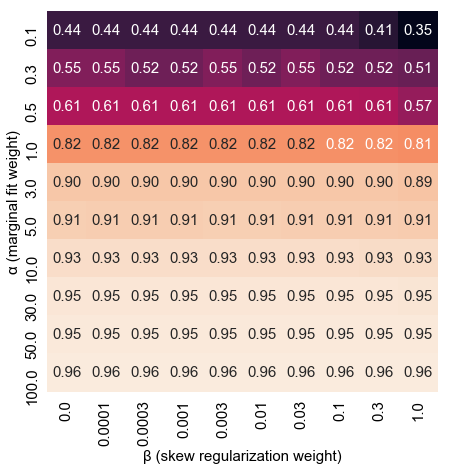

In [48]:
#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#
fig, ax = plt.subplots(figsize = (7, 7))

sns.heatmap(
    mean_matrix,
    annot = True,
    fmt = '.2f',
    cbar = False,
    ax = ax,
    yticklabels = [f'{s}' for s in mean_matrix.index],
)
# plt.yticks(rotation = 90)
plt.xlabel('β (skew regularization weight)')
plt.ylabel('α (marginal fit weight)')

# for tick in ax.get_yticklabels():
#     tick.set_rotation(90)

##

sns.despine(trim = False, bottom = True, left = True)
ax.yaxis.set_ticks_position('none') 
ax.xaxis.set_ticks_position('none') 
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = results_dir + f'{modelexp_nm}.pdf'
print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()

## Explore

In [53]:
df.columns

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'data_readlen', 'data_num_proposed_gts', 'data_proposal_type',
       'data_num_groups', 'R2 overall', 'random_seed', 'alpha_marginal',
       'beta_skew', 'dataset', 'Name'],
      dtype='object')

In [54]:
df.head()

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,...,data_readlen,data_num_proposed_gts,data_proposal_type,data_num_groups,R2 overall,random_seed,alpha_marginal,beta_skew,dataset,Name
0,0,0,simplev2_smart_rl_1,0.822239,34.0,0.645928,0.463194,-0.126919,0.035147,0.951950,...,3,66,smart,19,0.676077,0,0.1,0.0000,simplev2_smart_rl_1,0
1,1,0,simplev2_smart_rl_1,0.821657,34.0,0.645748,0.463447,-0.125948,0.033640,0.951979,...,3,66,smart,19,0.675120,0,0.1,0.0001,simplev2_smart_rl_1,1
2,2,0,simplev2_smart_rl_1,0.820326,34.0,0.645402,0.463943,-0.123788,0.030819,0.952065,...,3,66,smart,19,0.672935,0,0.1,0.0003,simplev2_smart_rl_1,2
3,3,0,simplev2_smart_rl_1,0.820539,34.0,0.645448,0.463893,-0.124037,0.031133,0.952067,...,3,66,smart,19,0.673284,0,0.1,0.0010,simplev2_smart_rl_1,3
4,4,0,simplev2_smart_rl_1,0.820522,34.0,0.645455,0.463951,-0.123819,0.030970,0.952161,...,3,66,smart,19,0.673256,0,0.1,0.0030,simplev2_smart_rl_1,4


In [51]:
tmp_matrix = df.groupby(['beta_skew', 'alpha_marginal'])['R2 overall'].agg('std').reset_index().pivot(columns = 'beta_skew', index = 'alpha_marginal', values = 'R2 overall')

display(tmp_matrix)

tmp_matrix.to_csv(results_dir + f'{modelexp_nm}-temp.csv')

beta_skew,0.0,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1.0
alpha_marginal,,,,,,,,,,
0.1,0.299867,0.299821,0.299606,0.299767,0.299668,0.300302,0.301296,0.301603,0.335006,0.316660
0.3,0.284936,0.284439,0.324908,0.324516,0.284953,0.324970,0.284670,0.324697,0.324767,0.321391
0.5,0.262587,0.261883,0.262288,0.262011,0.262273,0.262525,0.262534,0.262324,0.263670,0.314795
1.0,0.059872,0.059830,0.059915,0.059888,0.059870,0.059867,0.059884,0.062558,0.062723,0.060436
3.0,0.029589,0.029530,0.029542,0.029508,0.029608,0.029606,0.029530,0.029441,0.029257,0.028278
5.0,0.028445,0.028546,0.028984,0.028828,0.029394,0.028818,0.028707,0.028541,0.029225,0.029916
10.0,0.007162,0.007146,0.007168,0.007172,0.007165,0.007146,0.007197,0.007213,0.007475,0.007647
30.0,0.003832,0.003600,0.003516,0.003932,0.004002,0.004064,0.004167,0.004362,0.004342,0.004723
50.0,0.003202,0.003243,0.003265,0.003208,0.003277,0.003230,0.003213,0.003238,0.003492,0.003387


In [55]:
tmp_matrix = df.groupby(['beta_skew', 'alpha_marginal'])['R2 overall'].agg('median').reset_index().pivot(columns = 'beta_skew', index = 'alpha_marginal', values = 'R2 overall')

display(tmp_matrix)

tmp_matrix.to_csv(results_dir + f'{modelexp_nm}-temp.csv')

beta_skew,0.0,0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1.0
alpha_marginal,,,,,,,,,,
0.1,0.673522,0.671617,0.672684,0.673013,0.672676,0.672384,0.674542,0.676900,0.678908,0.245337
0.3,0.696769,0.696116,0.696449,0.696519,0.696628,0.696683,0.696828,0.696379,0.695662,0.689187
0.5,0.712896,0.712684,0.712673,0.713180,0.712542,0.712666,0.712629,0.712324,0.711450,0.705381
1.0,0.854020,0.854012,0.854053,0.853985,0.853988,0.854060,0.853939,0.853954,0.853917,0.851166
3.0,0.905649,0.905722,0.905747,0.905707,0.905728,0.905720,0.905416,0.905403,0.904828,0.899889
5.0,0.914493,0.914540,0.914336,0.914324,0.914493,0.914286,0.914331,0.914429,0.914368,0.914044
10.0,0.932557,0.932489,0.932489,0.932499,0.932508,0.932483,0.932419,0.932454,0.930977,0.930188
30.0,0.947980,0.947975,0.947981,0.948062,0.947804,0.947800,0.947976,0.947964,0.947553,0.947315
50.0,0.952715,0.952732,0.952429,0.952727,0.952642,0.952787,0.952652,0.952454,0.952461,0.952066
